In [2]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt

import time
from pympler import asizeof
import cmasher as cmr

sz = np.array([[1,0],[0,-1]], dtype="float64")
si = np.array([[1,0],[0,1]], dtype="float64")
sx = np.array([[0,1],[1,0]], dtype="float64")
sy = np.array([[0,-1j],[1j,0]], dtype="complex64")

def terms(index, operator, qubits):
    k=0
    if k in index:
        if operator == "X":
            matriz = sx
        elif operator == "Z":
            matriz = sz
        elif operator == "Y":
            matriz = sy
    else:
        matriz = si
        
    k=1
    while k != qubits:
        if k in index:
            if operator == "X":
                matriz = np.kron(matriz, sx)
            elif operator == "Z":
                matriz = np.kron(matriz, sz)
            elif operator == "Y":
                matriz = np.kron(matriz, sy)
        else:
            matriz = np.kron(matriz, si)
        k=k+1
    return matriz

In [36]:
import pennylane as qml
from pennylane import numpy as np

basis = 'sto-6g'
element = 'Na'
basis = qml.qchem.load_basisset(basis, element)
print(basis)

KeyError: 'Na'

In [43]:
import pennylane as qml
from pennylane import numpy as np

symbols = ["H", "H"]
geometry = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 2.0]], requires_grad=True)

basis = 'sapporo-dzp'
element = 'H'
basis = qml.qchem.load_basisset(basis, element)

coeff = np.array([basis["coefficients"], basis["coefficients"]], requires_grad = True)
alpha = np.array([basis["exponents"], basis["exponents"]], requires_grad = True)

args = [geometry, alpha, coeff]
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, alpha=alpha, coeff=coeff, args=args, load_data=False)

/Users/jnorambu/Documents/vqesimulation/venv/lib/python3.9/site-packages/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)


TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable exp method

In [41]:
basis

{'orbitals': ['S'],
 'exponents': [[35.52322122,
   6.513143725,
   1.822142904,
   0.6259552659,
   0.2430767471,
   0.100112428]],
 'coefficients': [[0.009163596281,
   0.04936149294,
   0.1685383049,
   0.3705627997,
   0.4164915298,
   0.1303340841]]}

In [3]:
itera = 250
sites = 3
j = 1.0

params = {
    "sites": sites,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [j,j,j]
}

open_spin_chain = vqt_spin(params)

In [4]:
ansazt = he_ansatz()
ansazt.set_device( ansatz_params )
ansazt.set_node( ansatz_params )
ansazt.set_state( ansatz_params["electrons"] )
ansazt.begin_state = np.array([0,0,0])

minimizate_params = {
    "maxiter": itera,
    "tol": 1e-6,
    "number": open_spin_chain.qubits*ansatz_params["repetitions"],
    "theta":["generic", 0.01]}
open_spin_chain.node = ansazt.node

NameError: name 'ansatz_params' is not defined

### Memoria

In [ ]:
def pennylane_hamil(qubits, params):
    terms = []
    coeff = []

    matrix = np.zeros((qubits,qubits))
    for i in range(qubits-1):
        Xterm = ["I"]*qubits
        Yterm = ["I"]*qubits
        Zterm = ["I"]*qubits

        Xterm[i] = "X"; Xterm[i+1]= "X"
        Yterm[i] = "Y"; Yterm[i+1]= "Y"
        Zterm[i] = "Z"; Zterm[i+1]= "Z"

        terms.extend( [qml.pauli.string_to_pauli_word(list_to_string(Xterm)),
            qml.pauli.string_to_pauli_word(list_to_string(Yterm)),
            qml.pauli.string_to_pauli_word(list_to_string(Zterm))] )

        coeff.extend( [-params["exchange"][0], -params["exchange"][1], -params["exchange"][2]] )

    return asizeof.asizeof(terms) + asizeof.asizeof(coeff)

In [ ]:
print("Representacion pennylane")
for i in range(1, 10):
    params = {
        "sites": i+1,
        "spin": 0.5, 
        "pattern": "open",
        "exchange": [1,1,1]
    }
    print( pennylane_hamil(i+1, params) )

print("Nuestra representacion")
for i in range(1, 10):
    params = {
        "sites": i+1,
        "spin": 0.5, 
        "pattern": "open",
        "exchange": [1,1,1]
    }
    system = vqe_spin(params)
    system.set_group_characteristics()
    print(asizeof.asizeof(system))

### XXX model open

In [5]:
valores_9open = []
itera = 250
sites = 3
j = 1.0

params = {
    "sites": sites,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [j,j,j]
}

open_spin_chain = vqe_spin(params)
open_spin_chain.set_group_characteristics()

In [16]:
for i in range(10):
    print(i+1)
    ansatz_params = {
        "repetitions": i+1,
        "base": "default.qubit",
        "interface": "autograd",
        "electrons": 0,
        "qubits": open_spin_chain.qubits,
        "pattern": "chain"
    }

    ansazt = he_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )
    ansazt.begin_state = np.array([0,0,0])

    minimizate_params = {
        "maxiter": itera,
        "tol": 1e-6,
        "number": open_spin_chain.qubits*ansatz_params["repetitions"],
        "theta":["generic", 0.01]}
    open_spin_chain.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(open_spin_chain.cost_function)

    valores_9open.append(energy1)

1
2
3
4
5
6
7
8
9
10


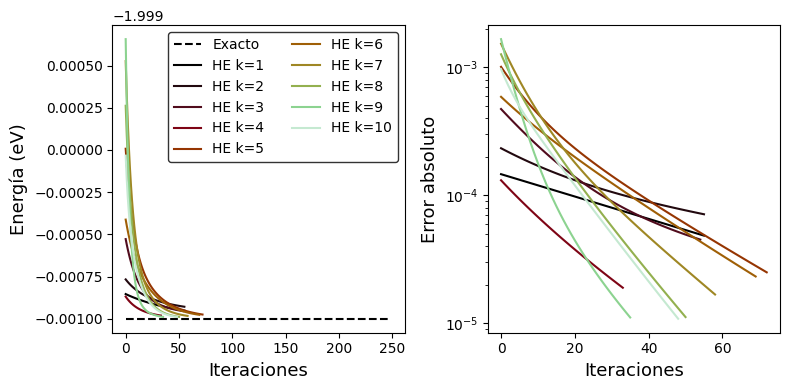

In [18]:
ex = -2

cycle = [cmr.apple(i /10) for i in range(10)]
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Iteraciones", fontsize=13)
ax[1].set_xlabel("Iteraciones", fontsize=13)
ax[0].set_ylabel("Energía (eV)", fontsize=13)
ax[1].set_ylabel("Error absoluto", fontsize=13)

ax[0].plot([j for j in range(itera)], [ex for j in range(itera)], marker='', color="black", ls="dashed", label="Exacto")
for i in range(10):
    ax[0].plot([j for j in range(len(valores_9open[i]))], valores_9open[i], label="HE k="+str(i+1), color = cycle[i])
    ax[1].plot([j for j in range(len(valores_9open[i]))], [abs(valores_9open[i][j]-ex) for j in range(len(valores_9open[i]))],
               "-", label="Exacto",  color = cycle[i])

ax[1].set_yscale("log")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=2)
fig.tight_layout()
plt.show()

In [6]:
ansatz_params = {
    "repetitions": 10,
    "base": "default.qubit",
    "interface": "autograd",
    "electrons": 0,
    "qubits": open_spin_chain.qubits,
    "pattern": "chain"
}
ansazt = he_ansatz()
ansazt.set_device( ansatz_params )
ansazt.set_node( ansatz_params )
ansazt.set_node_overlap( ansatz_params )
ansazt.set_node_thermal( ansatz_params )
ansazt.set_state( ansatz_params["electrons"] )
ansazt.begin_state = np.array([0,0,0])

In [4]:
energias = []
estados = []

for i in range(10):
    minimizate_params = {
        "maxiter": 250,
        "tol": 1e-6,
        "number": open_spin_chain.qubits*ansatz_params["repetitions"],
        "theta":["generic", 0.01]}

    open_spin_chain.node = ansazt.node
    open_spin_chain.node_overlap = ansazt.node_overlap
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQD(open_spin_chain.cost_function, open_spin_chain.overlap_cost_function, 8)
    energias.append(energy1)
    estados.append(optimum)

state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8
state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8


In [18]:
energias

[[-1.9999891604288664,
  -1.9999798301746654,
  -1.9998698914050774,
  -1.9965681237873643,
  -0.0022339940263424486,
  -0.0028201179319703243,
  3.9994563563485537,
  -1.9996321984842824],
 [-1.9999868706660198,
  -1.9999804562972556,
  -1.9998041893613618,
  -1.995389147643683,
  -0.0026396153885571184,
  -0.004311558915424889,
  -1.9996651248124584,
  3.99988795063037],
 [-1.9999870270175428,
  -1.9999796775013368,
  -1.9997842575068392,
  -1.9974015697940222,
  -0.0016341031040423247,
  -0.0023684317904902955,
  3.999480593030995,
  3.9987238268989627],
 [-1.9999874163681373,
  -1.9999800476045426,
  -1.999839049045545,
  -1.997603328683477,
  -0.0016203524968654154,
  -0.001982563791358888,
  3.999589307819548,
  3.9985340712649458],
 [-1.9999894229018804,
  -1.9999799349262135,
  -1.999854811673516,
  -1.9973968670673166,
  -0.001632352053102682,
  -0.0022613265792553426,
  3.999450952087619,
  3.998753952398758],
 [-1.9999905373908031,
  -1.9999803174410675,
  -1.999876997796235

In [37]:
for j in range(10):
    print(j+1)
    for i in estados[j]:
        print([j.numpy() for j in i])

1
[0.013009527852319453, 0.00558909899200198, 0.008343841102117649, 0.0032058609622945627, 0.014313867206020984, -0.00039632233788486717, 0.01384193405254488, 0.009404818757830396, 0.005603737355680055, 0.016928311850209824, 0.00200296693266117, 0.0036060126810997634, 0.015027096089032337, 0.01435823526773255, 0.00109504033782311, 0.0022213361098864593, -0.00018559762959693312, 0.0009527863831410103, 0.021667477012062827, 0.009546514475119342, -0.002190151986377373, 0.010152955478126485, -6.824409528724655e-06, 0.003055775396974151, 0.001310087183260757, 0.0008348730539422057, 0.010008203830849926, 0.007904225848497157, 0.015853953752796607, 0.012442971244028829]
[0.08980848946288816, 0.22264188128763326, 0.3228034243633378, 0.07105712672081503, 0.13773116251868667, 0.27814188663729417, 0.29910180509720374, 0.2419295046086722, 0.3022950019300563, 0.0645025747769416, 0.15639579382672916, 0.30696705238192434, 0.2335470833106531, 0.23698760271913502, 0.3121882127340993, 0.0831858899884741

In [8]:
estados = [
[[0.013009527852319453, 0.00558909899200198, 0.008343841102117649, 0.0032058609622945627, 0.014313867206020984, -0.00039632233788486717, 0.01384193405254488, 0.009404818757830396, 0.005603737355680055, 0.016928311850209824, 0.00200296693266117, 0.0036060126810997634, 0.015027096089032337, 0.01435823526773255, 0.00109504033782311, 0.0022213361098864593, -0.00018559762959693312, 0.0009527863831410103, 0.021667477012062827, 0.009546514475119342, -0.002190151986377373, 0.010152955478126485, -6.824409528724655e-06, 0.003055775396974151, 0.001310087183260757, 0.0008348730539422057, 0.010008203830849926, 0.007904225848497157, 0.015853953752796607, 0.012442971244028829],
[0.08980848946288816, 0.22264188128763326, 0.3228034243633378, 0.07105712672081503, 0.13773116251868667, 0.27814188663729417, 0.29910180509720374, 0.2419295046086722, 0.3022950019300563, 0.0645025747769416, 0.15639579382672916, 0.30696705238192434, 0.2335470833106531, 0.23698760271913502, 0.3121882127340993, 0.08318588998847412, 0.17768464666903525, 0.2275002019020596, 0.2347249790045077, 0.210366847430075, 0.25817275865910616, 0.17589516786749784, 0.20586378216364243, 0.35366978236889823, 0.29482083112985213, 0.17591411167480048, 0.3644475816749451, 0.12263669779386206, 0.21712902891943692, 0.24812842038975108],
[-0.5819864848783327, 0.7038470894229731, -0.06722700616414296, -0.41637946414895916, -0.3026760610186349, 0.18408180427411144, 0.034381365605782054, 0.4569070121577658, 0.13556037543671617, -0.23670088430137992, -0.19383859563235262, 0.17386850910400678, -0.2773463928984791, 0.3066317074831806, 0.044643330964032044, -0.5796829044095428, -0.10142809206014104, 0.4416671597186881, -0.13207063792126028, 0.16022951925846135, 0.47699288268147416, -0.33915537631206166, -0.03962938166180672, 0.3067953280167556, 0.10648402711186582, -0.12898672668597402, 0.052275892200236165, -0.41478658145454456, 0.10408135346982741, 0.3981984970179418],
[-0.3743925217086541, 0.06360796044492398, 0.2500807793888749, 0.8353218673943692, -0.5622510974916561, 0.48465786042990705, -0.09533840166441414, -0.07550798151503262, 0.7237051548662462, -0.06173674891908127, -0.2434288412470025, 0.4057064619957648, 0.01748876810209528, -0.11036595065876031, 0.5243817575589311, 0.11387719868114886, 0.04631455915729998, 0.4684674370077038, -0.5670773064917909, -0.45134730345414475, 0.8791805632954901, 0.5679868851077395, -0.027298979235707843, 0.5125997387387633, -0.10297665526226578, -0.3403817286728516, 0.12446539329359507, -0.7067964164433653, 0.4894388039645328, -0.14451796579595141],
[0.20742728212458028, -0.033175433488758045, 0.20821245012577036, -0.059591538461783375, 0.044943325455506465, 0.267029565548722, -0.7111768335839628, -0.026710156757084196, 0.26933560400805917, 0.033841160664289514, 0.023929271179976525, 0.35156565307411713, -0.16906352023115082, -0.01606445688768072, 0.3514076355610274, -0.05945111056533756, 0.02103813010710433, 0.2152332256194301, -0.42448867409588054, -0.026551013403271838, 0.20726358918652857, 0.060307349986019394, 0.002210375771926905, 0.5137036848831754, -0.48311980821491185, -0.061729365106269446, 0.5305260019611241, 0.006506672897307504, 0.003112145400285844, 0.11921282875290225],
[0.9932763294732876, -0.020818609377707294, 0.004695635346755056, 0.004539181598600513, 0.5005606900809763, 0.013588750066441843, -0.013587068796759185, -0.015021030818533555, 0.027124585750694614, -0.3192888741514925, 0.487768718535906, 0.012791112395611893, 0.49165111611991225, -0.007899672365141943, 0.044198805281859425, -0.020636645822417966, 0.6320918683696869, 0.019525568430154273, 0.027118532661939514, 0.005536556827661048, 0.0305640640520193, -0.32507608565316476, 0.6320606571900277, 0.008544837072946955, -0.5258899430919665, 0.005823331414886381, 0.09718424028194309, -0.038379427145178585, 0.37599267082348964, 0.0371802920799984],
[0.09876579060108148, -0.3546869361184653, 0.2566740734311205, 0.26039952805150474, 0.13143468161610222, 0.27168011783104395, 0.3588214530599212, -0.34257548380453207, 0.2098477228439008, 0.10006444288702013, -0.0025076116946934996, 0.28620470418370175, 0.20984675520468815, -0.3335494938120055, 0.23599205460663622, 0.12132839454011489, -0.10001049171756012, 0.270750437178312, 0.34964729383511495, -0.3502694208565874, 0.1419643047971666, -0.13596029304678414, -0.22076093718356088, 0.2783368266881813, 0.2023812754946661, -0.3254225364333759, 0.21278202695950693, -0.1546521749907714, -0.29330429681982, 0.2865252184514922],
[0.014533722744717054, 0.008099482384690835, 0.009837140030853174, 0.003861690665859131, 0.014167026495636741, 0.0011513219413371552, 0.010029457135498254, 0.011908572147161902, 0.007118704915397041, 0.014386570209411044, 0.0018685653642952693, 0.005096958078128609, 0.01647853905595493, 0.01691957129379615, 0.002515626523498094, 0.002886917228374854, -0.00027423705292086873, 0.002554435380260019, 0.017868688314101336, 0.012102679579266704, -0.0006185809908830713, 0.007524511619350391, -0.0001091497144386584, 0.004531824501961315, 0.002754664913694417, 0.0034220238244669562, 0.011388779077379521, 0.008580852757328856, 0.01578661721068704, 0.014049776826230067],
],
[[0.015983715896041924, 0.009279738976165958, 0.006618214509465447, 0.01761166022265502, 0.009014366042007067, 0.010807836386633306, 0.018592417683554904, 0.0015090192096025709, -0.0026973383520897316, 0.013311013708856859, -0.003051856312853877, 0.013363878637182056, 0.00473146111066019, 0.015850814740786832, 0.0013018784481640298, 0.011529900949267098, 0.004304417651005864, 0.008260211111768964, 0.017899919658280004, 0.0008551938127296224, 0.004181025481705424, 0.004798042409434493, 0.002542372553440179, 0.005184839836212667, 0.001324737053443985, 0.012144425204681885, -0.0027011629622720845, 0.015681819440482834, 0.013131945149894898, -0.002557682076100567],
[0.08581343468644831, 0.21193315734062745, 0.3201532926498455, 0.09887623975537517, 0.1559902190693468, 0.2889409256169946, 0.2981109802766025, 0.220538497741304, 0.289669205475005, 0.06711472638774567, 0.1673857046450651, 0.31918593474808443, 0.2160840055707548, 0.23103944631285522, 0.30848256684826697, 0.10403707832819435, 0.19312580648656497, 0.24125505447986922, 0.23044879120556858, 0.19419503709630073, 0.2559120384795714, 0.16019570201321892, 0.2164140253701229, 0.35428394638380695, 0.2895734367432107, 0.18854981326616818, 0.3418833237840471, 0.13967615974760134, 0.22452183566606457, 0.2405835641109536],
[-0.5637465919850954, 0.6919275425014652, -0.03308697606568829, -0.46850556441085195, -0.2871194577213197, 0.24260030438118338, 0.10417422159870096, 0.4137261914413097, 0.1482539497342543, -0.28911889460349777, -0.1728724634809777, 0.2212385636629375, -0.23241017843926454, 0.26836407614127045, 0.041081740599705936, -0.59569615852611, -0.06896477073137514, 0.4449791277970227, -0.11813185039856512, 0.142055703074171, 0.4740997364428264, -0.39809956052210893, -0.020861898230408214, 0.3267253923645606, 0.14069796622469566, -0.1363431267566641, -0.02123295073439046, -0.4104724104950658, 0.08855211642079379, 0.36393647168309157],
[-0.32697103360290947, 0.07965740824570514, 0.2626811444807602, 0.8339247144923375, -0.5164721130707695, 0.46676525931033036, -0.16923806251352522, -0.09032410979880216, 0.727409661485131, -0.1858290119745742, -0.1913659535769663, 0.4834885226774231, -0.017919349740531932, -0.08553629933884632, 0.5891329734765633, -0.016215063271669047, 0.12526599720567108, 0.5053655505661099, -0.5361276206694606, -0.4368670770484118, 0.796805098119188, 0.5380451344927959, -0.01445042481629839, 0.5103405706680759, -0.14231174814891578, -0.2912750817286961, 0.15935455541999216, -0.8180387443245392, 0.5327868293196526, -0.11018557267012336],
[0.20294759537811147, -0.053588984634644274, 0.2104384861687149, -0.058131857218371726, 0.09233357421015709, 0.2793457503546724, -0.6906962313309082, -0.0470761851183091, 0.2613476580931964, 0.0010808138880118994, 0.06790739404121252, 0.364440684812098, -0.18411255554787, -0.03150717192512987, 0.3500582667191854, -0.06417795599647598, 0.05665891906277728, 0.21622751547257943, -0.417582570881364, -0.04130721286504022, 0.20756262855354093, 0.03058878749687378, 0.037714861549033266, 0.5224283722849125, -0.49260756493416563, -0.038926732429626416, 0.5141307195869729, -0.011583733250011477, 0.018555678427679894, 0.09608076402925068],
[0.9901149389870341, 0.05831791509988256, -0.016575712102447866, -0.00726039114135468, 0.5149861709979505, 0.011886079353626067, -0.08249609448831682, 0.037275100638760925, 0.00015196583399593581, -0.30763722981677744, 0.5024097526754293, 0.025587477839819663, 0.4817875611687168, 0.041433988368024005, -0.006490909183486731, 0.028371521126831795, 0.6402615957455363, -0.00524414718692145, -0.032192461029013575, 0.005983286257126673, 0.029017041536150548, -0.3177301903271306, 0.639494472005511, -0.01012478878377104, -0.5496369288783611, 0.0036246474538427008, 0.036031041523333085, 0.023049514268019586, 0.35674591622295126, -0.021285423263369133],
[0.013903479624901497, 0.009228919450851037, 0.008395203114724747, 0.019056643163042238, 0.010765995974195966, 0.012588716385753356, 0.01748211855126886, 0.0015162872016044689, -0.0008575294174159932, 0.011013071383944252, -0.0013257813807488338, 0.015189024478187773, 0.0026313978406946564, 0.01589607497147903, 0.003099268501272462, 0.012910697477310612, 0.0060423289211337956, 0.009999914283099008, 0.016756612880061552, 0.0009417982249248175, 0.006058218313192422, 0.0025006479340076576, 0.004256282164240446, 0.007031708288668167, -0.0007996003255681043, 0.012245569542791369, -0.000873151979237981, 0.017010122677130906, 0.014850175393372788, -0.000842736759319701],
[0.05953455525182778, -0.33449446548403156, 0.273777072136965, 0.13743420823106878, -0.02322611282098964, 0.27457682225053354, 0.3832158181822498, -0.319977259131277, 0.24378599616722982, -0.022197120594780677, -0.15570278826517683, 0.3246424077187847, 0.21519375081442615, -0.2599291534230817, 0.264089430807682, 0.011906374769092133, -0.23762212128102567, 0.31783851126099577, 0.2819595340578337, -0.19216666871989976, 0.17795545362955112, -0.06057467728897407, -0.29658515044913564, 0.37674799434505246, 0.24131172719111543, -0.10425740986870997, 0.2674772826719033, -0.1160267208921692, -0.33985320642567884, 0.3993085085293308],
],
[[0.007532901311743345, 0.009169985635115641, 0.001242559374818179, 0.004870551504405126, 0.0011055021884967982, 0.010716317353127983, 0.020102690793521595, 0.01377204078679496, -0.003436047866680159, 0.010546990742065025, 0.012462649216183185, 0.004300900788396706, 0.006471163334508575, 0.0036760718188810723, 0.0060488878431385895, 0.002799227335673543, 0.011079750443432103, 0.008107041970410673, 0.019327457367098684, 0.003980759629621036, 0.0007004371058220795, 0.015504587027504103, 0.007108606930558536, 0.004955147552585198, 0.015962851584085475, 0.012309884684617573, 0.0019519265547158135, 0.017550643118331103, 0.0026365588607670195, 0.010912140671435425],
[0.0733228811295523, 0.20986541891013086, 0.3149142639348002, 0.08601705256405975, 0.14388011010923826, 0.29207046452604984, 0.30071732760950054, 0.232071109606997, 0.2947797582696868, 0.06812002068432937, 0.1804970267120308, 0.3094929322413482, 0.21596895226940233, 0.21501624082842505, 0.31464238199822037, 0.09141432618527745, 0.19995763263311686, 0.2421716282501679, 0.22962364208359232, 0.193114568289249, 0.25739172660198767, 0.1730419205796192, 0.2216067333545609, 0.3558716740634981, 0.30273643747417894, 0.17665373664286368, 0.3509260227683865, 0.1329548483811996, 0.2141615416803321, 0.2530847415182854],
[-0.5729647591458191, 0.710065583959058, -0.053582323480522186, -0.4621294938878964, -0.3292627656654015, 0.23626111027744937, 0.0849852539484393, 0.43354590472450344, 0.1576000027684094, -0.27917027264561783, -0.1833470424853582, 0.22571741473762838, -0.2358152501989466, 0.2525749737024849, 0.06288508398204617, -0.587385752795137, -0.06718457171175193, 0.4450091820606856, -0.1326947471369934, 0.12255683221500394, 0.4847438095811202, -0.37207246939651195, -0.012598872460645677, 0.3069158471500968, 0.14371578884837868, -0.15447445624129852, 0.015186405893394738, -0.4028919432719037, 0.11122303437364632, 0.37481137461676983],
[-0.3801972787159872, 0.04271578426628934, 0.27914659379731316, 0.8139041161408704, -0.5260761850411023, 0.5127458742353594, -0.1254750923987253, -0.10395302884366117, 0.7284706340227034, -0.10127228841775636, -0.21080198508221246, 0.4268783998756496, -0.016385803710392857, -0.1403899891324229, 0.5621347920432614, 0.05599182062248594, 0.09151229513290954, 0.4752467025408554, -0.5671381569982223, -0.4656500049388637, 0.8479824132730711, 0.5675502877901493, -0.01368513098866222, 0.48627608205167827, -0.0956702177966366, -0.35616074745458093, 0.11098227422438088, -0.7029238807912803, 0.4656797468579862, -0.1636631068633097],
[0.20191907004686097, -0.03419784749005065, 0.20995908285916887, -0.06706079119617539, 0.04764824461046989, 0.2812128084631623, -0.6994137216611285, -0.026351185107078536, 0.261200849279615, 0.004704847060255663, 0.04938805550953614, 0.3558169405353513, -0.18440178225552697, -0.04273708537726573, 0.3603399254649828, -0.07322802850152915, 0.04292231016763344, 0.21300963129282421, -0.4172962790233707, -0.051618246114950056, 0.20313935446120815, 0.07088589601629683, 0.02056101375250665, 0.5156102230973538, -0.4833364281407183, -0.06818426647891797, 0.5248870006474422, 0.005501258729356095, 0.0065937117026676545, 0.10997718706455961],
[0.9633542845815454, -0.10021263677965828, -0.0478672845992788, 0.1342166842213864, 0.50163738711004, -0.0264117347688671, 0.15131493958027026, -0.1291066574437351, -0.050421014819805605, -0.3291584703373388, 0.4937332042163091, -0.0686222463090974, 0.4717896553339506, -0.15306055285354164, -0.024638957795862677, -0.05193618088800908, 0.6233585929119144, 0.06752626616870337, 0.21372467167895134, -0.09619795086856212, -0.05785228189238244, -0.3000954332772671, 0.608430194892593, 0.07044580908093981, -0.5067674878974282, -0.06676871935394947, -0.015469198479496097, -0.13363847581132135, 0.33630859304555205, 0.1427299103563634],
[0.05199372515675582, -0.3610104972419662, 0.22418059914746688, 0.2359446197688401, 0.15052236950340095, 0.2763490674120326, 0.36955980365543095, -0.34585056557231475, 0.1818641910309417, 0.19247307618758427, 0.04107368551899626, 0.2553837678013119, 0.17584589722453908, -0.3767674239123314, 0.2239389588358183, 0.11656454268910918, -0.048610962960453315, 0.2767123521808195, 0.37448663290035045, -0.3905828027402341, 0.16824297932100712, -0.13393147239546277, -0.19917288594273488, 0.27320017689567494, 0.21617401825093654, -0.3440011553654694, 0.21165872906467456, -0.15377522033856672, -0.29326056018927116, 0.27006598467383125],
[-0.9062193629418362, 0.039886627565624264, -0.2543823520709054, -0.3954645646468321, -0.09914462578417592, -0.19264809954958015, 0.17741448573132276, -0.05299094225628036, -0.12658576092510526, 0.34197625743924787, -0.01749659867321007, -0.1752308633870008, -0.8696734012722721, -0.11885337812417038, -0.01717777360334212, -0.18781946471920347, 0.274166115990974, -0.02291393931401559, 0.11877497785041481, -0.17284343515502967, 0.03792928840163101, 0.24174528669917586, 0.29920550356254116, -0.09543295254741772, -0.6205249154887098, -0.24072998316932898, 0.29595129334379705, 0.17361887499052495, 0.4698357009315486, 0.15308849046993048],
],
[[0.004400391336009825, 0.0141251943194831, 0.012389557282903177, 0.009034915477524576, 0.001257647774814306, 0.002647401951836491, 0.012166727433313491, 0.0017614741884049044, -0.0002480243765247232, 0.010993582475032852, 0.009807373011980626, 0.006376633710194197, 0.010740461861754261, 0.008611760803910433, -0.00139936551027629, 0.009669753958992526, 0.015868309845494248, 0.007411962373286349, 0.018356250229600028, 0.006874162110401992, -0.0003016883082990443, 0.009178443972885504, 0.000215781592263367, 0.007057211958928604, 0.008943543728554597, 0.0026733970573287053, 0.003848290036211088, 0.007516106837426252, 9.61811714984197e-05, -0.0016391376332269543],
[0.08251248617810941, 0.22841595933044634, 0.32461537745305363, 0.08244146280516529, 0.13059760488342131, 0.27982927849243666, 0.29614433240887783, 0.23112723532246793, 0.2975270277881437, 0.06121115097674843, 0.16785006147214007, 0.30852003254502575, 0.23041486305705156, 0.2301781791198865, 0.3088573202239391, 0.09404927494307283, 0.19690108790165411, 0.23612977338790736, 0.2317828722237479, 0.2025576328942103, 0.2561613372162953, 0.16890891054870957, 0.2090482583216408, 0.35724564157081334, 0.30312698435068675, 0.17199643088472116, 0.35482522293408797, 0.12302135679510401, 0.20683968665420235, 0.2382805844304508],
[-0.5895672822938145, 0.7121141729504807, -0.05678920741355263, -0.43630060745560373, -0.32559216602266916, 0.20876240367513274, 0.04913786333376965, 0.4396275475286003, 0.15355862672646484, -0.26084946839527456, -0.18977746503538162, 0.19440251501742226, -0.25647920180327843, 0.2817291501096034, 0.050967292574725646, -0.572747930889172, -0.08059732829604019, 0.44370982472480214, -0.13582930011000116, 0.14410835634401542, 0.4861249649530823, -0.3574706038691791, -0.03233639492981369, 0.3048804173219757, 0.12833407055433343, -0.14544995976960648, 0.03808438070991095, -0.4047559510561552, 0.09897121880235797, 0.3692169276282046],
[-0.4130217860626493, 0.06260198036793765, 0.26190639874961075, 0.7992473016056865, -0.5704053898481808, 0.5154949118325498, -0.0919963104143709, -0.08534951231866639, 0.7253657804809244, -0.05176761064396637, -0.2468392352210485, 0.3870149557251572, 0.004589930090535248, -0.1314550843406851, 0.5215354893779697, 0.11346185368334269, 0.050799746629449, 0.47577957881801924, -0.5789615484584316, -0.47059182951617795, 0.8988485099021968, 0.55809151523662, -0.02935106336583554, 0.4784750434103238, -0.07822991482320024, -0.3769429408679347, 0.10300022887356286, -0.6682478313324126, 0.4350428997662226, -0.16495516403587124],
[0.20287830518688696, -0.003958614440661694, 0.2139907601869487, -0.04975631049807526, 0.013584957790749037, 0.2695482860086679, -0.7134270463676057, -0.02050526018762676, 0.2638997003283748, 0.020915160366236522, 0.014671920446040832, 0.3544236988689729, -0.16879608729438755, -0.024223571352361268, 0.3511913501398444, -0.04802841274468907, 0.027482680388953448, 0.21932384046867673, -0.42373893057161305, -0.03398152236341903, 0.2101765508685728, 0.06307440194226493, -0.007154094892688314, 0.5140070057302141, -0.4785957434527531, -0.07941858049914412, 0.528323339422954, 0.022113861674638614, -0.01504088862201177, 0.10872984901954694],
[0.9661337411107507, -0.09286332254076358, -0.030872405343218536, 0.17477316543667865, 0.4483014231442198, -0.03225054029414667, 0.15730506886271986, -0.16313731901127163, -0.031414771981857645, -0.38179499044594395, 0.4329783890924045, -0.062092689473588765, 0.5020818001982469, -0.16433258991133037, -0.022286139450622754, -0.0500032652035302, 0.6061035023338125, 0.08385323489049826, 0.23758266907463851, -0.11011036597125878, -0.040821401902087814, -0.35623005137045916, 0.5765730715570094, 0.07507155355703454, -0.4319716148953771, -0.08768783258314813, 0.00853554332084857, -0.18379453512838045, 0.362368228391169, 0.1693487281906559],
[0.10256907990721327, -0.34664886483760887, 0.2610548273980829, 0.2761283085769454, 0.10971764329643385, 0.27301574462991357, 0.34527358997029906, -0.3513968724274767, 0.19858591156626243, 0.07628509760417669, 0.0006570355960227833, 0.29004644733120255, 0.20911660827027417, -0.3328461731551645, 0.23154688585622885, 0.12982447805954925, -0.08609569402091799, 0.280647024676378, 0.34036537574434567, -0.3480498166126149, 0.14784117204036895, -0.13839182911912, -0.22017772750090073, 0.2814490533585355, 0.2199898976191858, -0.317965551884059, 0.2096558348863831, -0.1552853837197255, -0.30944893424247155, 0.2769905253127343],
[0.18631515366984058, 0.16021602822565514, -0.2526145642980553, -0.3508736383123329, -0.36326813275878717, -0.13215132245479433, -0.21149092862065502, 0.16462714607155096, -0.2717075066389863, -0.45941736981531595, -0.37936417096216124, -0.1829060971919638, 0.5032376891504203, 0.19883402053180005, -0.3725396194180515, -0.09142609349559755, -0.26683984764762725, -0.22968531335918316, -0.13322323696140137, 0.19320024167292743, -0.19363582689211617, -0.3323079785144306, -0.26768321163478687, 0.055052812827566404, 0.6207427000311503, 0.16142812056989186, -0.2504526696940524, 0.11373250936851037, -0.2615634725469928, -0.45889771317237316],
],
[[0.012938337390255742, 0.010255712637785817, 0.00496407929978806, 0.0038552970373016042, 0.0023521702752337423, 0.005395413735923106, 0.02040979826824686, 0.0015261337174376879, -0.002836033128746201, 0.018635477992571283, -0.0005719111018444023, 0.006785063728505944, 0.004355048361987632, 0.0047193455216981645, 0.00295132961738673, 0.0033135752953262687, 0.006120254165801515, 0.0074633261151573396, 0.009861064622021024, 0.013047843264653722, 0.004520955593171373, 0.005283160319461191, 0.006760802412467919, 0.0026118761361864705, 0.008871117297134407, 0.004710370366138775, 0.006428862318280837, 0.006748525060696767, 0.013552636593714229, -0.0014924518880069409],
[0.08622881211085633, 0.2275545194704398, 0.3171800472729157, 0.07767170319593301, 0.13213717093169722, 0.2811274557567011, 0.30533431945842765, 0.23419457638731933, 0.2924624547776121, 0.0721158031815107, 0.15813786316878, 0.3099753576251509, 0.22304650215766278, 0.22503980927687703, 0.3133264116264453, 0.08687475538941614, 0.1877699930022836, 0.23472783686781556, 0.22268344416522248, 0.20820912130841324, 0.26173013455603383, 0.17204801550561186, 0.21665190057410855, 0.35304170008459596, 0.30521617021368247, 0.17245096211952446, 0.35738668381634575, 0.12254636904751634, 0.2203666169997714, 0.2368492306899604],
[-0.5745418910329911, 0.7112859882203771, -0.06508393872699023, -0.43946648548670936, -0.32252281464565974, 0.20563054810155465, 0.0520653801407999, 0.4390381182700804, 0.14196412886153922, -0.24853659965313907, -0.2010397325404742, 0.19845441307268882, -0.2663672370726261, 0.2769801285261033, 0.06247892091899049, -0.5801419414691942, -0.088181601452295, 0.442584124437464, -0.14793562618351802, 0.14511827507183211, 0.4914613834937623, -0.3617023828423932, -0.028058981381667472, 0.2984089739131485, 0.1267097168257415, -0.14034233906544993, 0.04624262883900365, -0.4112695606575624, 0.11271665743399326, 0.37099213191108815],
[-0.38292794025435495, 0.06417235229306044, 0.26735818021738444, 0.8118608856454832, -0.5554137505546968, 0.5130991843554004, -0.09460131488861143, -0.09428580552544091, 0.7230549767205648, -0.046788043406302625, -0.24353879464997727, 0.407147671577218, 0.0002645883684816985, -0.1368341200057515, 0.5303497764459134, 0.09982800419339444, 0.055984946398079556, 0.4533161325324239, -0.587061785653227, -0.4551802841468022, 0.8861352632497623, 0.5569168906964251, -0.0235602532135008, 0.49830923039825226, -0.08987427811061259, -0.3547991867140955, 0.11126505852893015, -0.6934651938939017, 0.46563073451180376, -0.17073155392006154],
[0.20353975764408636, -0.025206620943515036, 0.21096282022867988, -0.05938518640574348, 0.03335049866283851, 0.27622068253633864, -0.6979735301723502, -0.032377021654688524, 0.26380510470465207, 0.03236417412957504, 0.020548701576950767, 0.35468421184254123, -0.17989556117217312, -0.025509330979064496, 0.35350975088037273, -0.058312846057122454, 0.02690856507824074, 0.2163587995895896, -0.4292411224403776, -0.023482675730927327, 0.20893117537815636, 0.05582963616735122, 0.006417215270073473, 0.5143212765280974, -0.47974140901926043, -0.06289749939593284, 0.5302113887694486, 0.004966157651824263, 0.0025684668022960743, 0.10428923460067122],
[0.9767660103248911, -0.07262641745559, -0.02637562908273498, 0.11025928663587944, 0.4947374181479523, -0.012615130255635315, 0.10878685822208663, -0.11252010541083962, -0.022421510628294544, -0.32167873173751993, 0.48025208152270243, -0.03604857738379316, 0.48666873424020407, -0.11369206477180129, -0.004648192533558275, -0.04555626876150836, 0.6254956342349413, 0.06793432966613237, 0.16024825670223913, -0.05428098836241659, -0.025039165093926792, -0.3224891747950595, 0.6198432900428053, 0.04684548917629563, -0.4993551179709916, -0.0471115057461208, 0.031642881904867436, -0.11809580062681321, 0.36460845842024675, 0.11421979310767316],
[0.07006746841584588, -0.35608696934660544, 0.238096784999986, 0.24940583057165785, 0.1458282969250994, 0.2751538493054063, 0.37009020582133273, -0.35545869802703756, 0.18651758966413332, 0.17184423266407867, 0.019341480299034774, 0.27040606716764376, 0.17848830503831234, -0.3681964123825982, 0.22251829407318838, 0.11801893076960221, -0.06339625893546044, 0.2795975408175298, 0.3561330870114061, -0.3743517020759925, 0.16039711315036692, -0.14600202440075685, -0.20408674062233126, 0.27584593864403517, 0.2061020193394512, -0.33944724169675244, 0.2116214436125522, -0.16991767005749925, -0.28827499337102336, 0.265925280049024],
[-0.8895479655849178, 0.04418578485006482, -0.2518751464947823, -0.4081875795800377, -0.09830415486151954, -0.19953070948274196, 0.17891823854672068, -0.06564472904898536, -0.12650788069833505, 0.35094819540847644, -0.028454903900708272, -0.17227934376062867, -0.8680907551992103, -0.12291739890504333, -0.022362993823429093, -0.18310306947026267, 0.2684910346941451, -0.01681385448394368, 0.11676129716857865, -0.16522674981084443, 0.03439727008797603, 0.23430658700614748, 0.2973013379562727, -0.09905511621881417, -0.6305337939540536, -0.24846943309953506, 0.2891118398556113, 0.16508158619575924, 0.4804452497696095, 0.1481825153391162],
],
[[0.006764323760199485, 0.006197559117327662, 0.003979338332313507, 0.01708495504565172, 0.00398831251254196, 0.0011051883987803518, 0.019501959682522697, 0.014404678642095551, 0.0060866084933482905, 0.004660574310331861, 0.0021595364288078517, 0.003972830000256697, 0.005538015070426663, 0.006144465199538569, 0.012668802715885271, 0.006206046143828113, 0.005060214750563892, 0.008932192543452941, 0.022412129203248286, 0.011943113274154352, 0.007855418229878395, 0.009428863714044174, 0.007078128170823519, -0.00011058924809791124, 0.0031895702124073947, 0.007732139285846308, -0.0015636257912644105, 0.00905729726276818, -0.0009540039612190193, 0.0059966366302206045],
[0.07917835666564482, 0.22198016400936535, 0.3124371703979275, 0.08388553794456849, 0.12856900489065448, 0.2765891828467239, 0.31388810192446015, 0.24404086271532813, 0.3031635877252878, 0.04993167125301577, 0.15633506227136434, 0.3018033288530066, 0.2202427860352021, 0.22993081878879465, 0.32007796093707425, 0.08645671768788875, 0.18425743316613866, 0.23743883367748805, 0.24554134410314557, 0.21246360498390635, 0.2708104424252258, 0.17732353631643316, 0.2165639899175121, 0.3485443809818251, 0.2895409964389716, 0.18213783356578692, 0.3490170850810168, 0.12906645774683442, 0.20606780812210101, 0.24563090601011692],
[-0.6031657775854373, 0.6891297859831318, -0.07597955776443728, -0.38461633518707905, -0.3091296444144475, 0.1754224806209204, 0.05061962701772924, 0.4636627233168239, 0.13308680885570845, -0.2594819945307577, -0.18573896672094037, 0.1653627957373006, -0.2966076401733948, 0.30904820087534524, 0.06026191772000166, -0.5734558410190799, -0.09246187285931175, 0.4445796286690052, -0.12499108194891967, 0.17061484190316506, 0.4777896353394697, -0.3453285763647222, -0.023586210723815674, 0.2993633838803765, 0.08606642051507543, -0.10974782249535943, 0.03912887920480649, -0.41275334015798365, 0.07418651912163958, 0.3953213756615909],
[-0.4068197526177565, 0.029924137040071876, 0.23889971534251084, 0.8481579083684702, -0.5348050756569223, 0.48122019603124033, -0.06627112417662241, -0.07721500196702076, 0.7215924419245964, -0.09361409398897035, -0.2470880332258383, 0.40684372979319167, -0.007744296197572075, -0.11817174974675539, 0.5466558927803662, 0.12034490668031575, 0.05474017539537535, 0.47854619560280065, -0.5542198024840462, -0.44894092954322184, 0.8901787075464844, 0.5646394457619109, -0.017935538928888904, 0.5043126030086073, -0.10753429510100501, -0.3388456650426241, 0.11563714705044556, -0.6918300508465253, 0.4558291784816805, -0.13309028045440488],
[0.1894922109938991, -0.028728136195525358, 0.21866914692604403, -0.044231047495435445, 0.040546503848835846, 0.27038127870285417, -0.6958907495482118, -0.017603823201067424, 0.2714760481271405, 0.017319488135100224, 0.029716432129726852, 0.36204042757440597, -0.18809939698945075, -0.02736545837947898, 0.371126116380916, -0.05299145303120296, 0.02771656550817737, 0.21241958075713196, -0.4057903668233211, -0.02301032626438776, 0.20614334612712526, 0.05576203756640521, 0.01039224201465096, 0.5153178958334982, -0.49396309441700337, -0.05110586911292942, 0.5213152827993389, 0.003232858610478217, -0.013583931469941572, 0.09827263483611935],
[0.9497211327769914, 0.02626258764268085, 0.019770783048510127, -0.03534587374759858, 0.5503425208144538, 0.02832012220100574, -0.08136434816991511, 0.0406734807588659, 0.0512052327329583, -0.27254642137216256, 0.5456408519967237, 0.041711502680192414, 0.4518367392078339, 0.038992660293560306, 0.069075182721849, -0.002783397640609, 0.651756311954999, 0.0016599390696895987, -0.04636023399354627, 0.04742234875470904, 0.07329202725293466, -0.2614718232424281, 0.6529575868814009, -0.01651469141220335, -0.5938486665380179, 0.04276658706324831, 0.11095595517029484, 0.003229837828545589, 0.32454223150239486, -0.02171984740334098],
[0.0030763219225730934, 0.007760907601009627, 0.006354777126974409, 0.017315368803513795, 0.0060925651883052675, 0.0034909695529044085, 0.01551539816542065, 0.016037317692101722, 0.008464409041388824, 0.00554765557386431, 0.00427047953491589, 0.006337745142726532, 0.001824738362883683, 0.00780695046176862, 0.015088860909165246, 0.006366021110361922, 0.007189419293807811, 0.011286507877976281, 0.018352759815635847, 0.013652438842730933, 0.010235440262375498, 0.010241480194664067, 0.009213849800788858, 0.0022662600241796856, -0.0005775989890362021, 0.009482033359817343, 0.0008987373464937596, 0.00914587491727095, 0.0011802428124580637, 0.008309379713846501],
[0.05002532772232992, -0.32382171212883193, 0.2686084207387267, 0.1161755391286947, -0.033907487998339605, 0.26889685015972387, 0.37797748121365804, -0.2970295926554168, 0.24878219453477682, -0.023810461674579998, -0.15050917445972387, 0.30753133300301055, 0.19770497717915692, -0.2664040902118858, 0.263730544379076, -0.006679086295583304, -0.2343764764864296, 0.32049759182697085, 0.28404891648537395, -0.189564785575336, 0.17701095379698978, -0.08040840845719467, -0.30233080606592083, 0.3643809252553632, 0.21182825280638415, -0.13302842337177323, 0.25555027920994894, -0.14372235290381244, -0.3702727940361695, 0.4093837462650115],
],
[[0.008980210154546989, 0.010823595798519178, 0.004909472080172801, 0.008176376582715174, 0.003452022340192315, 0.004000718165447814, 0.0073070721855846435, 0.007491347481167939, 0.007228674286055909, 0.011143287635806702, 0.0008608452918433195, -0.003794376768496278, 0.008771870896625943, 0.0012743323063632139, 0.001114277834977872, 0.002095355196380915, 0.0007839591175493924, 0.0014136707472008326, 0.012808495603695572, 0.007476436787934699, 0.010000754728874559, 0.013185703877759145, 0.01211701337554782, 8.010999008510491e-05, 0.008957643342882626, -0.002723214981159282, 0.004835140392670762, 0.011998546727318827, 0.01201034222241956, -0.003326027845899958],
[0.0855730617295837, 0.2336601257091884, 0.3151825694291665, 0.07675982149357258, 0.12324160512144078, 0.27817979071483356, 0.29284145131162526, 0.2445287190808412, 0.30186312601042425, 0.06089694278698454, 0.15140602733951355, 0.296423588537437, 0.23067237736765156, 0.2301612103276137, 0.31093629753723, 0.0845342757811411, 0.17525027967422468, 0.2259899940357795, 0.228373833379951, 0.2141266561222216, 0.26778210161615845, 0.1779990349233779, 0.21542468668846113, 0.3462055086818468, 0.30711060495756687, 0.17896354715891305, 0.3549982783777635, 0.13083847212133567, 0.2135463873310061, 0.23130301345197873],
[-0.5898184844723788, 0.7005116947369967, -0.06459267256276759, -0.42293604525487677, -0.3138411636117701, 0.19232558777566253, 0.025067350258469852, 0.4460138953608187, 0.14852473914047723, -0.24661676057292897, -0.19688104045361865, 0.17043792808241032, -0.2802266260796857, 0.28991824891364626, 0.0494542207057461, -0.5795978027590521, -0.10414444689787536, 0.4298336672991131, -0.137362919895161, 0.1603281935807501, 0.4969635207045074, -0.34543071657765073, -0.03055458337071518, 0.29682901701347186, 0.11820304269602731, -0.12159748198920921, 0.044926317787367366, -0.40349606512746616, 0.09611230933336708, 0.3712557265847153],
[-0.38394007522530893, 0.08334690260246683, 0.2317308143018991, 0.8177863963071025, -0.5898540585669652, 0.49248994376814176, -0.09495232405077572, -0.06722838780266026, 0.7210708011583539, -0.07174863165133842, -0.2552351560294957, 0.386754797357453, 0.03256352567132181, -0.1159498479401512, 0.541646160910257, 0.11329571629678623, 0.04054377765759769, 0.474882142598956, -0.588730571937996, -0.45512894069569726, 0.89140941168856, 0.5564164253958604, -0.018587416668575024, 0.49002728336939927, -0.07084450836440066, -0.35985057400912485, 0.12008673056956846, -0.6880801232247152, 0.45924108616761716, -0.14706138205379865],
[0.2159631237530316, -0.020009642414842477, 0.19930783709833794, -0.053176966768794104, 0.03812727266621258, 0.26976137807541606, -0.7161461935837001, -0.01969381943755958, 0.2691864731862552, 0.016737480232442037, 0.024666714741388686, 0.3423725173842431, -0.1621452451368912, -0.029558671892075037, 0.34767527260835396, -0.054305187405505266, 0.021480695881846465, 0.217551199545574, -0.4383316177954007, -0.02673361885384901, 0.22063169178977693, 0.05249978402719375, 0.012472659363162731, 0.5144095620292437, -0.47105394137928547, -0.06422691206124197, 0.5276338063068904, 0.019246809233817996, -0.0043314251290886676, 0.1139542060368744],
[0.9986486096797377, 0.05903438787270792, 0.017737022904462253, -0.06825070740768233, 0.4617483582825513, 0.037663897017233584, -0.13314122414282842, 0.07309673078686292, 0.05497433688127738, -0.35806681365381404, 0.4512968768852442, 0.0554043531026716, 0.49939436453758307, 0.06659202154947706, 0.06894324171041585, 0.008351694408867906, 0.610046931709388, -0.006628671706342718, -0.11018893726317489, 0.06177605148563093, 0.0942127748027583, -0.34608898820824463, 0.6193532300640485, -0.008868959927033801, -0.5004949533050299, 0.0584054032929471, 0.14479621468744344, 0.029027642827303905, 0.3767520800748354, -0.05268978399587858],
[0.11587312526594473, 0.3588786758381432, -0.2647777475024338, -0.2764761989134447, 0.10506845065852671, -0.28185933477441916, -0.33168712449560644, 0.3499423032799457, -0.20511455068697967, 0.07713741174837116, -0.012640695048058537, -0.3012018976878391, 0.21476866153733556, 0.3341660216383967, -0.24664904539885554, -0.11246605540883604, -0.1138426991251376, -0.2713995730690859, -0.30232949223735206, 0.3528020346074587, -0.1330091740689861, -0.159600707577676, -0.2122246970471772, -0.27307547967830953, 0.20708579506649838, 0.3055916642034833, -0.21188919307330703, 0.20193540649247627, -0.30565499994016204, -0.2677928833518247],
[0.18993801607617086, -0.13092439522802313, 0.24158457136646716, 0.39480205142191505, -0.3432238715338095, 0.11743209121778099, 0.262570896838172, -0.15279336060200263, 0.2628224415616007, -0.45498725649388366, -0.38566429298612204, 0.1991176838422384, 0.5030563578191521, -0.18033652118503163, 0.34855433184304524, 0.1405269831095057, -0.27427288487498425, 0.21617002979726316, 0.18434622392890407, -0.18536428238512492, 0.21600969842376067, -0.32753860029374554, -0.25228503334530966, -0.03021656758935311, 0.6384429300063655, -0.17389003882441026, 0.24413344621544103, -0.07047022303151924, -0.23271064275509695, 0.44012121519727604],
],
[[0.008600849688635056, 0.016657189698977982, 0.006474315553223255, 0.003637621059092188, 0.009821598403697725, -0.004872272415413407, 0.012726385602559688, 0.009792416867584494, -0.003088725858505829, 0.01581025909181222, 0.008526918925802275, 0.0007854411610219802, 0.005870155341332455, 0.003132973600469096, 0.0017426559615577762, 0.005354878420828391, 0.005879769590818212, 0.005955977747145652, 0.017138515886764613, 0.0023996100703927723, 0.003642941620329788, 0.007143307187362813, 0.0004032955085101667, 0.007487060594389837, 0.010641274432108265, 0.002416678159541366, 0.009919605188196982, 0.007181835847766851, 0.0028139755617675247, 0.008731206157657554],
[0.08201510183007431, 0.22860795965824246, 0.3212513873505031, 0.07912262524028013, 0.1424175948276617, 0.27488962114891985, 0.2999643859213318, 0.23748587334703228, 0.2954284500723302, 0.07179526068522102, 0.1699437377485488, 0.3042512120785687, 0.2192713903340185, 0.22059467235083446, 0.3111110241242806, 0.09099629793155808, 0.1905369181900178, 0.23620456659284192, 0.23397223018520769, 0.19606330374609632, 0.2633453636375812, 0.17407757791179904, 0.21437054074874912, 0.35829172145126004, 0.29919639364940875, 0.1688025113397036, 0.36093862160869256, 0.12126435994771594, 0.21388771777299476, 0.24726813168494785],
[-0.5750957775005685, 0.7121230684260079, -0.057762302101454444, -0.43605636958811705, -0.3069175696491404, 0.2007122543118197, 0.05352502904955919, 0.44892439018305386, 0.13776044996707304, -0.2524007795472449, -0.18576295304716492, 0.1936318769950819, -0.2679569504767579, 0.28361098350043396, 0.047450282523295785, -0.5791311379565922, -0.09146663131546925, 0.4467791041780792, -0.13002170474695507, 0.14559577479279587, 0.48147773523359616, -0.3555118458069705, -0.033673539571205065, 0.30772372846135526, 0.12143352617150717, -0.13709611639998487, 0.04229114843320735, -0.4108935753541109, 0.09936387853651271, 0.3835192874126981],
[-0.38916778360237003, 0.0495145399628246, 0.26687325640324, 0.8241932129478381, -0.5369680961904859, 0.4969115036395365, -0.10456476182629729, -0.09317108999082484, 0.7218478184722413, -0.08157994733688342, -0.22664445543391093, 0.4132842631150981, -0.008436017718816432, -0.12916297036740929, 0.5358493647270932, 0.0937058476281172, 0.06824688564611463, 0.4734959276817339, -0.5648165583226542, -0.46326991051581673, 0.8735611047480685, 0.5587708011830085, -0.0244962367023413, 0.5076700651400053, -0.10036821535758139, -0.3466942652601751, 0.12021685364533904, -0.7109287698085728, 0.47468804963023875, -0.15831443109603321],
[0.18794151725877412, -0.026596485453028413, 0.21998506510626953, -0.06088020172908158, 0.05044018618896236, 0.2638957227178601, -0.7006322766369842, -0.02999149104329929, 0.2611943934343371, 0.019199660109854452, 0.040665361653619406, 0.35594801777044494, -0.1807338612153465, -0.033266732791181176, 0.3592286172614413, -0.06256515257998338, 0.034917163156779035, 0.2116457244189209, -0.42141612499023356, -0.03953735052955474, 0.2054259504830629, 0.06294943509711987, 0.010534284922882425, 0.5221175721785665, -0.478418124295968, -0.06318502892045352, 0.5334179356719074, -0.0015457712363863099, 0.0022890532755899017, 0.10945076520496096],
[0.9609012138488835, -0.04708204257054187, -0.034772441916183394, 0.10835224707237631, 0.5395843984946158, -0.03292383285240575, 0.10021808742451897, -0.09190666541869409, -0.036484918779169, -0.28862914005938367, 0.5284412561899603, -0.053179380938670605, 0.4556064208655516, -0.11347723797704252, -0.02412351932583924, -0.025902711934337304, 0.639073134848055, 0.05045464390628263, 0.15802338642574204, -0.0798953897948631, -0.028503031232100125, -0.2833421911469291, 0.6259247870166671, 0.06386948410638618, -0.5494493340313485, -0.05440077974319239, -0.003158825249831115, -0.1138867958098437, 0.32915693159998144, 0.10569819558169928],
[0.02429221183147489, -0.3545161586193206, 0.21249823821308533, 0.21382080525993125, 0.1772293508712262, 0.25284022489878294, 0.36592617673876177, -0.35056419416129697, 0.17745306126787563, 0.25815066608630044, 0.05911030988598228, 0.23457769517663324, 0.15761744251290252, -0.4023820111676687, 0.21340843849242097, 0.11595684701837898, -0.023353180998860888, 0.2714478781703099, 0.3846834384049677, -0.4181945803867002, 0.18185797684535027, -0.14254056816412042, -0.18759669749213356, 0.2699775476314964, 0.20625909864942546, -0.37306956163117294, 0.21795440598121774, -0.1694214129535156, -0.2754272540762314, 0.2642644219150426],
[-0.9092674109754997, 0.05348561097800912, -0.23676929331019334, -0.3913000100765428, -0.09015389727185623, -0.19680429857023882, 0.1576666553344239, -0.05214486200903986, -0.1156101279130871, 0.3460156103903785, -0.03046711961108845, -0.17319993429995717, -0.873318524969846, -0.11259768520330739, -0.022420040497723767, -0.1869187485596937, 0.2639575407587812, -0.02375505586919438, 0.11963041525712376, -0.167883325010519, 0.04083374928972718, 0.2397640493499445, 0.2870341049000879, -0.09073138871213046, -0.6380356733690437, -0.2403279748185546, 0.2824539704913704, 0.16072659263910702, 0.47722335562433854, 0.15193459012421134,]
],
[[0.009103433218726148, 0.012823092061546464, 0.0003253492228997246, 0.004337791354947525, 0.0024244537410969603, 0.0031249077317685586, 0.008276099958941196, 0.00361769475362353, 0.009803363412571752, 0.011700087402526628, 0.013395863954855333, 0.006349001726373606, 0.013388569130980589, -0.0010578179282751715, 0.0032775485350884054, 0.0005706290781316892, -0.0014887948504431554, 0.0027345658369223795, 0.018686681931702098, 0.006534875971383006, 0.0009980038030940087, 0.01986628139283406, 0.00840176220011686, 0.004570060469695917, 0.011960327218849934, 0.008266161585841722, -0.0018426204085801564, 0.007946510089369455, 0.015380270930889443, 0.003208839015239679],
[0.0837320651487417, 0.22679095149123096, 0.3134675705969197, 0.07849590708209611, 0.129833118874918, 0.28099430800357506, 0.29087939542259506, 0.23350526310107458, 0.3062620508889457, 0.06438550525315678, 0.16971036231739303, 0.3093158677926901, 0.23121274879199832, 0.22179874032665614, 0.3118739550279609, 0.0836322640040729, 0.17727092179560927, 0.23041462792525283, 0.2311042562012394, 0.20923037203142295, 0.2568380715138566, 0.17995879952987875, 0.21342402879478775, 0.3527041640706445, 0.3062036980045954, 0.18735532987681716, 0.347491847810152, 0.1253594735421205, 0.21765646731995267, 0.23942230643663748],
[-0.5766117136572896, 0.7108733218220226, -0.05909707211518393, -0.44483886044847065, -0.3155413056603414, 0.2094991244971678, 0.045205467532707586, 0.43987893365785724, 0.1580243275917236, -0.25973163486152434, -0.17790954018295999, 0.195211703265916, -0.25487498170145634, 0.2743015710501329, 0.045966409607253525, -0.5869942054192556, -0.09312852310936254, 0.4322496632395093, -0.13275151067035518, 0.14927365078895624, 0.48057820943359614, -0.35112832495895563, -0.02548794263541521, 0.30372332621315024, 0.1286751775941776, -0.12681337832726058, 0.021994980451708963, -0.4136656139254616, 0.10164039416610202, 0.3766492244621682],
[-0.3487631050370568, 0.08677691283141707, 0.2514333724700212, 0.8251218909356799, -0.5771657125050578, 0.4891365590895734, -0.14464267169630945, -0.08503619347154925, 0.7276314471862901, -0.1017073067165796, -0.2153062846740193, 0.4283472504059786, 0.02077517573274943, -0.12050953376835512, 0.5596424217690689, 0.06462602099952738, 0.0741437615005123, 0.47381351134510274, -0.5705427543411451, -0.4494290218948334, 0.8414935336493607, 0.5673906195305944, -0.007544830245915897, 0.504116199337271, -0.09407796596702703, -0.33174421761280815, 0.11850419867699508, -0.7329116140835039, 0.4866030091211607, -0.13967459832851534],
[0.21265960816761212, -0.036093954285935016, 0.19496797689207418, -0.06789474763825672, 0.06351518099904495, 0.2680434185999277, -0.717542917303571, -0.03516969699067795, 0.2687468272556293, 0.009569807553628839, 0.05779823899191698, 0.3526930602575509, -0.16539104875479813, -0.04015722653111361, 0.34904424454526023, -0.06700850899818847, 0.03293597390338585, 0.21942477947240785, -0.4316772176608757, -0.0350041092581218, 0.21052466314079524, 0.061040518453230996, 0.02239918203075606, 0.5187230026053627, -0.47345866347507537, -0.0508979450528337, 0.5175655152805813, 0.0008377117079135549, 0.007323481213455319, 0.12029914332661715],
[1.006974364193867, 0.04306475395391058, -0.008144391387344862, -0.024550461457032956, 0.46688564086715534, 0.013813401428367417, -0.09273237798610878, 0.03422309349005652, 0.031029674809689583, -0.34959085432130077, 0.47598043707925125, 0.03378132073878771, 0.5007587686830317, 0.024872951329392316, 0.041874965806785756, -0.002817800830879249, 0.6194683262546283, 0.0005656149338568639, -0.04503364132962262, 0.03137630262446352, 0.047952919483513504, -0.3389296966330678, 0.6293435114127378, -6.866540601325056e-05, -0.5107330447471866, 0.034405199000096545, 0.09100388548033037, 0.012865528875879603, 0.38268796883392436, -0.01841923270241472],
[0.1477073535729701, 0.35323109616936066, -0.27970852687994646, -0.30663336620058707, 0.07173749137065892, -0.27681431227398334, -0.3122270094573907, 0.33793690661246056, -0.20736618588018754, -0.01044483238145373, -0.024437857994709704, -0.305834614816742, 0.24403667399561021, 0.3074890932207238, -0.26151937894546956, -0.12279749734295424, -0.14035409807467167, -0.27471573596500576, -0.2697292352126076, 0.3228960126394272, -0.12761409090723702, -0.1511549210166347, -0.22160196205836524, -0.2687820079334023, 0.23349919592972757, 0.2968867355725682, -0.21847491528506946, 0.18712607994419256, -0.3137599168365268, -0.2825589856751695],
[0.012557326409140462, 0.013564495014940264, 0.0023922022393837853, 0.004642806641505865, 0.0028007746306058148, 0.005214218963653027, 0.005434277241457529, 0.0043443495696772385, 0.011913571022446855, 0.007342401217218452, 0.013778279040990752, 0.0084094998511854, 0.01672587930428444, -0.0003017916484697839, 0.005308738830711194, 0.0008117283767283208, -0.0010402087621247584, 0.004859747820842196, 0.015891041871072133, 0.007289415098810183, 0.0031395030185979314, 0.015493937853623463, 0.00884739976589516, 0.006575996491884882, 0.015245256069092406, 0.009070151208732257, 0.00011653563423751382, 0.008211524017012901, 0.015881743970614356, 0.005354367706843359],
],
[[0.013667055802221328, 0.010866883544201629, 0.0070341049923213946, 0.0034722660024882777, 0.003676599672710725, 0.003847717425925288, 0.01295571393146128, 0.001079944228863372, 0.00043532608013882796, 0.008981496302449583, 0.0126247821108419, 0.0018059253255990073, 0.005135693378799869, 0.011882841915310433, 0.00921981616226534, 0.010542155904173997, 0.010975275612390522, -0.0008915595836643427, 0.019735245266534116, 0.007759877454793655, 0.0064165785805066315, 0.01575294827013168, 0.004366646605955531, 0.006102853738777387, 0.008742342591086891, 0.005209628002574963, -0.001932373511975104, 0.010150571301995672, -0.0009002438349697785, 0.007133353389522546],
[0.08993173878199626, 0.2240527633917817, 0.3210313803325241, 0.0803393397603404, 0.1333057847594892, 0.28096181092604156, 0.2906492407485989, 0.22987736126653793, 0.29623976149528297, 0.06124682608684787, 0.17030401605874673, 0.30622594338141207, 0.22507456731895367, 0.23352564033904166, 0.3198354457186088, 0.09828862539982443, 0.19177298038308946, 0.2284143790666395, 0.22555283064472711, 0.20476507904023108, 0.26086691865302525, 0.17676805417969477, 0.2129961867274498, 0.35712774776713796, 0.30426219985054237, 0.17772019200024072, 0.34916180288326604, 0.12920449861214875, 0.20512854703764374, 0.24655901460368596],
[-0.5739925047554614, 0.7099570844535908, -0.051643847745566115, -0.451849040686331, -0.3116925773111908, 0.21496543235240922, 0.05624974837140396, 0.43311544779594363, 0.15126069511563542, -0.2622897009205546, -0.1794533425313044, 0.18826520161216134, -0.25492481538513995, 0.28721875709990335, 0.05477542699956074, -0.5833850832331827, -0.07589484716088238, 0.4365261283457003, -0.13541568578282256, 0.1561807888215033, 0.48422175260347144, -0.35283722546589164, -0.02463561824478793, 0.31337882561773706, 0.1312673011873519, -0.13530057825583922, 0.007906590745006228, -0.40821374190064447, 0.08595351979322419, 0.38541580028998856],
[-0.357128290038532, 0.08633470129128845, 0.24957911620899095, 0.8168514070802813, -0.5782401911775495, 0.4893088990459379, -0.12321041290085583, -0.08495047394592431, 0.7204952146468219, -0.09700235865997325, -0.22989786350591682, 0.41351382528871694, 0.02162057678652317, -0.10765136288121685, 0.563666409223853, 0.08791759315688422, 0.0757703842900713, 0.4719143131279798, -0.5674172108719603, -0.44782455727689147, 0.8690274426215912, 0.566380592030463, -0.012124376918996335, 0.5061452741673607, -0.08639382930912458, -0.3391301900784955, 0.11407413161334035, -0.7282890382964416, 0.4650652760255944, -0.13326346063504024],
[0.21240286467703462, -0.024004150685195413, 0.20581424764133127, -0.05729984437789796, 0.0391020802726452, 0.2736686044085438, -0.7131329350911252, -0.03080322834973299, 0.2659243159593738, 0.013954887022454286, 0.038653672429516124, 0.3491268034274477, -0.17524308293020355, -0.024799312918671903, 0.35803256656983723, -0.05081960247734198, 0.033349255606216155, 0.21064062120889182, -0.42550875053678416, -0.03167977248309682, 0.21408983634130901, 0.06025141440819156, 0.007967740390972543, 0.5187935928503962, -0.47779940137822424, -0.05836543910816031, 0.5186987406770085, 0.005342681282382277, -0.010134265881458148, 0.11572226913753926],
[1.0015588444204988, -0.016089347837821056, -0.016311161964836386, 0.04642666422567765, 0.4812243232371306, -0.002708107238275382, 0.01765534220012987, -0.04018884790628889, -0.006506687310129525, -0.34203959337364503, 0.4886457354863118, -0.01222552573115829, 0.4923848899727008, -0.04040941167062452, 0.015446830876138582, -0.008084732451477583, 0.6349752580957749, 0.025589995552791314, 0.07814053092956127, -0.032526408254067954, 0.013063326686955565, -0.3319665249267691, 0.6253435792354611, 0.029827042980041824, -0.5088587499839431, -0.022817459229030918, 0.04175228503136575, -0.06953668917219792, 0.3655398890954521, 0.060571870593850115],
[0.10411920466236867, -0.35054179077377223, 0.2524963122345841, 0.2650725100613989, 0.119862554048641, 0.2711741195082144, 0.35147083966556486, -0.3519180346312143, 0.19666107009114797, 0.08591490094158553, 0.01091116798990006, 0.2823868216728315, 0.20170844728500248, -0.33124025553504366, 0.24402161067901554, 0.1303881114597404, -0.08707003708716905, 0.2705615596216883, 0.3493315775427901, -0.35037364739098004, 0.15765989582778608, -0.13322711836857776, -0.21958514297627102, 0.2801477591813792, 0.21813737193909688, -0.3203424783243542, 0.20748724540514277, -0.15275072328909356, -0.3114267139611979, 0.2808273284691575],
[0.19400713311559353, 0.1550320747827461, -0.25499164825977605, -0.35902928793651573, -0.3649449467251563, -0.12598603659026109, -0.20890468561514564, 0.1614368672042004, -0.2714910532592035, -0.4639668077430693, -0.3790133096199682, -0.1899219920789464, 0.49841379027284266, 0.20360936037674748, -0.3637576273425334, -0.08727303447932082, -0.2692325313352117, -0.23531168676640155, -0.12966326738005096, 0.19541580110091636, -0.18926746922951873, -0.3262259127741985, -0.26013386871011185, 0.05745941533031249, 0.6207368939426148, 0.16770951190227956, -0.25911743869035275, 0.12134306288561778, -0.26146391733332397, -0.452424911134061],
],
]

In [39]:
energias = [[-1.9999891604288664,
  -1.9999798301746654,
  -1.9998698914050774,
  -1.9965681237873643,
  -0.0022339940263424486,
  -0.0028201179319703243,
  3.9994563563485537,
  -1.9996321984842824],
 [-1.9999868706660198,
  -1.9999804562972556,
  -1.9998041893613618,
  -1.995389147643683,
  -0.0026396153885571184,
  -0.004311558915424889,
  -1.9996651248124584,
  3.99988795063037],
 [-1.9999870270175428,
  -1.9999796775013368,
  -1.9997842575068392,
  -1.9974015697940222,
  -0.0016341031040423247,
  -0.0023684317904902955,
  3.999480593030995,
  3.9987238268989627],
 [-1.9999874163681373,
  -1.9999800476045426,
  -1.999839049045545,
  -1.997603328683477,
  -0.0016203524968654154,
  -0.001982563791358888,
  3.999589307819548,
  3.9985340712649458],
 [-1.9999894229018804,
  -1.9999799349262135,
  -1.999854811673516,
  -1.9973968670673166,
  -0.001632352053102682,
  -0.0022613265792553426,
  3.999450952087619,
  3.998753952398758],
 [-1.9999905373908031,
  -1.9999803174410675,
  -1.9998769977962352,
  -1.9973833317895873,
  -0.0017110657225981388,
  -0.002187323368230902,
  -1.9993160563986252,
  3.9998089996128674],
 [-1.9999882827512407,
  -1.9999796434314732,
  -1.9998852416658397,
  -1.9964701707767025,
  -0.0022513031094325807,
  -0.002871815355201167,
  3.9994687727654052,
  3.9991814417553586],
 [-1.999989743172093,
  -1.9999803322364955,
  -1.9998616375443754,
  -1.9971848244231065,
  -0.001753309973027823,
  -0.002450183755235886,
  3.999455141452268,
  3.9986594498221657],
 [-1.9999878305288323,
  -1.9999792884086527,
  -1.9998400120336133,
  -1.9958284399106825,
  -0.0025290224375685427,
  -0.0036049593227627866,
  3.99936303049183,
  -1.9995070811630515],
 [-1.9999886398253552,
  -1.9999795579104436,
  -1.9998515456471155,
  -1.9967309852155124,
  -0.0020982167235505562,
  -0.002732198514353766,
  3.9995175590888286,
  3.998005919046522]]

In [42]:
J1 = 1
J2 = 1
J3 = 1
h_open = -J3*np.kron(si, np.kron(sz, sz)) -J3*np.kron(sz, np.kron(sz, si)) -J1*np.kron(si, np.kron(sx, sx)) -J1*np.kron(sx, np.kron(sx, si)) -J2*np.kron(si, np.kron(sy, sy)) -J2*np.kron(sy, np.kron(sy, si))
ex = np.real(np.sort( np.linalg.eigvals(h_open) ))

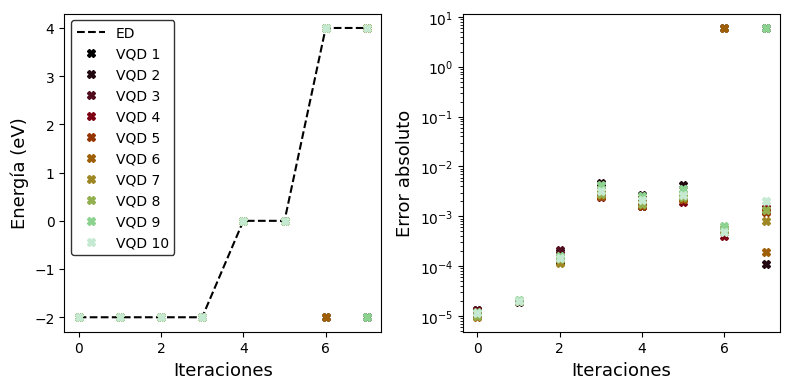

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
cycle = [cmr.apple(i /10) for i in range(10)]

ax[0].set_xlabel("Iteraciones", fontsize=13)
ax[0].set_ylabel("Energía (eV)", fontsize=13)

ax[1].set_xlabel("Iteraciones", fontsize=13)
ax[1].set_ylabel("Error absoluto", fontsize=13)

ax[0].plot([j for j in range(len(ex))], ex, "--", label="ED", color="black")
for i,ee in enumerate(energias):
    ax[0].plot([j for j in range(len(ee))], ee, "X", label="VQD "+str(i+1), color = cycle[i])
 
    ax[1].plot([i for i in range(len(ee))], [np.abs(ex[j] -ee[j]) for j in range(len(ee))], "X", color = cycle[i])
ax[1].set_yscale("log")

ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)
fig.tight_layout()
plt.show()

In [37]:
t = 1
k = 8.617333262e-5
for i in range(10):
    thermal_params = {
        "sites": open_spin_chain.qubits,
        "energy": np.array(energias[i]),
        "states": estados[i],       
    }
    
    thermal_object = quantum_thermal( thermal_params )
    thermal_object.node = ansazt.node_thermal
    minimizate_params = {
        "type": "SLSQP",
        "maxiter": 250,
        "tol": 1e-6,
        "number": 2**3,
        "theta":["generic", 0.01]}

    optimizer = scipy_optimizer(minimizate_params)
    optimizer.begin_state = np.array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],requires_grad=True )
    energy1, optimum = optimizer.Thermal(thermal_object.cost_function, 3, t)
    #print(np.round(optimum,5))
    values = np.array(thermal_object.expected_value("enthalpy"))/4
    aux2 = np.sum(values*values*np.array(optimum)) - np.sum(values*np.array(optimum)*np.sum(values*np.array(optimum)) )
    print( np.divide(aux2, t*t*k) )

139.69495130735626
141.4850667467625
172.31470264007714
181.975284916803
173.32631978976642
141.01658964778474
177.4000006054189
183.14991315793975
140.53281054497958
172.13258749279402


In [13]:
for i in range(10):
    thermal_params = {
        "sites": open_spin_chain.qubits,
        "energy": energias[i],
        "states": estados[i],
        
    }
    thermal_object = hybrid_thermal( thermal_params )
    thermal_object.node = ansazt.node_thermal

    values = thermal_object.expected_value("magnetization")
    print(values)

[ 0.99762903 -0.42347182 -0.37771668 -0.19169247 -0.99456462  0.99347281
 -0.53526956  0.9965128 ]
[ 0.99668856 -0.42644416 -0.46050033 -0.10410962 -0.99838732  0.99707396
  0.99565294 -0.58611699]
[ 0.99699519 -0.42684962 -0.39533929 -0.170276   -0.99458719  0.99358849
 -0.57554595  0.57506999]
[ 0.99796044 -0.43654246 -0.38545441 -0.17181055 -0.99026966  0.98946384
 -0.53431199  0.5339534 ]
[ 0.99820876 -0.4366721  -0.37538925 -0.18175906 -0.99368924  0.99270751
 -0.56100398  0.56052551]
[ 0.99635291 -0.42728292 -0.38846278 -0.17647338 -0.9971711   0.99640775
  0.99478485 -0.55602072]
[ 0.9989119  -0.42804071 -0.40321897 -0.16263482 -0.99454449  0.99347814
 -0.51932953  0.5188928 ]
[ 0.99818137 -0.43040793 -0.38579503 -0.17756705 -0.99547447  0.99447915
 -0.59556911  0.59504838]
[ 0.99858582 -0.42959717 -0.41095432 -0.15249847 -0.99708597  0.99579084
 -0.49258665  0.99770969]
[ 0.99775341 -0.42441996 -0.41977195 -0.14869266 -0.99595806  0.99502332
 -0.53582224  0.53532973]


In [5]:
for i in energias:
    print(i)

[-1.9999891604288664, -1.9999798301746654, -1.9998698914050774, -1.9965681237873643, -0.0022339940263424486, -0.0028201179319703243, 3.9994563563485537, -1.9996321984842824]
[-1.9999868706660198, -1.9999804562972556, -1.9998041893613618, -1.995389147643683, -0.0026396153885571184, -0.004311558915424889, -1.9996651248124584, 3.99988795063037]
[-1.9999870270175428, -1.9999796775013368, -1.9997842575068392, -1.9974015697940222, -0.0016341031040423247, -0.0023684317904902955, 3.999480593030995, 3.9987238268989627]
[-1.9999874163681373, -1.9999800476045426, -1.999839049045545, -1.997603328683477, -0.0016203524968654154, -0.001982563791358888, 3.999589307819548, 3.9985340712649458]
[-1.9999894229018804, -1.9999799349262135, -1.999854811673516, -1.9973968670673166, -0.001632352053102682, -0.0022613265792553426, 3.999450952087619, 3.998753952398758]
[-1.9999905373908031, -1.9999803174410675, -1.9998769977962352, -1.9973833317895873, -0.0017110657225981388, -0.002187323368230902, -1.99931605639

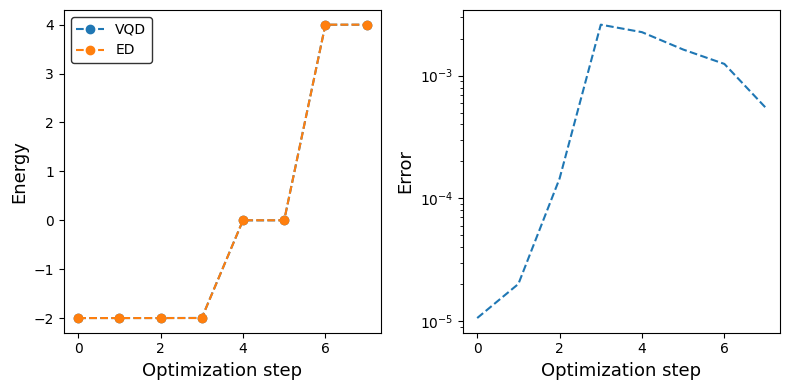

In [10]:
J1 = 1
J2 = 1
J3 = 1
h_open = -J3*np.kron(si, np.kron(sz, sz)) -J3*np.kron(sz, np.kron(sz, si)) -J1*np.kron(si, np.kron(sx, sx)) -J1*np.kron(sx, np.kron(sx, si)) -J2*np.kron(si, np.kron(sy, sy)) -J2*np.kron(sy, np.kron(sy, si))
ee1 = np.sort( np.linalg.eigvals(h_open) )
ee = ee1

energy1 = np.sort(energias[4])

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([j for j in range(len(energy1))], energy1, "o--", label="VQD")
ax[0].plot([j for j in range(len(ee))], ee, "o--", label="ED")

ax[1].plot([i for i in range(len(energy1))], [np.abs(energy1[j] -ee[j]) for j in range(len(energy1))], ls="dashed")
ax[1].set_yscale("log")

ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)
fig.tight_layout()
plt.show()

In [38]:
np.exp(-2/k)

0.0

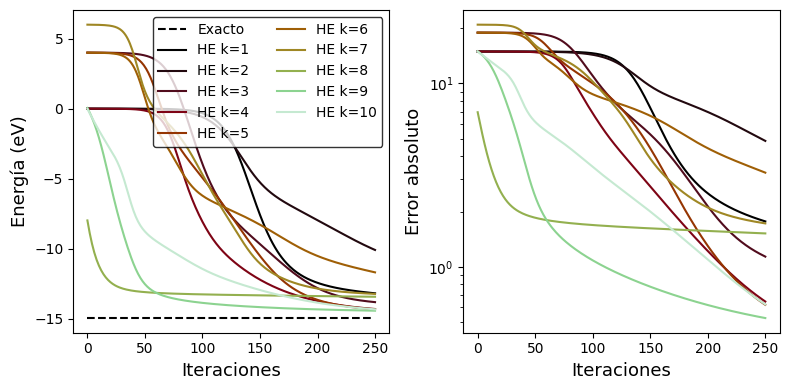

In [19]:
ex = -14.9452868255172

cycle = [cmr.apple(i /10) for i in range(10)]
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Iteraciones", fontsize=13)
ax[1].set_xlabel("Iteraciones", fontsize=13)
ax[0].set_ylabel("Energía (eV)", fontsize=13)
ax[1].set_ylabel("Error absoluto", fontsize=13)

ax[0].plot([j for j in range(itera)], [ex for j in range(itera)], marker='', color="black", ls="dashed", label="Exacto")
for i in range(10):
    ax[0].plot([j for j in range(len(valores_9open[i]))], valores_9open[i], label="HE k="+str(i+1), color = cycle[i])
    ax[1].plot([j for j in range(len(valores_9open[i]))], [abs(valores_9open[i][j]-ex) for j in range(len(valores_9open[i]))],
               "-", label="Exacto",  color = cycle[i])

ax[1].set_yscale("log")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=2)
fig.tight_layout()
plt.show()

In [43]:
valores_finales = [
[-7.861937377694006,
 -7.868121016341877,
 -7.871964974481033,
 -7.87434829941156,
 -7.8758258092156455,
 -7.876743611620323,
 -7.877316142973227,
 -7.877675754204578,
 -7.8779039784925535,
 -7.87805101202871,
 -7.878147766101676,
 -7.878213293495469,
 -7.878259354840095,
 -7.878293223761539,
 -7.878319409882017,
 -7.8783407175928755,
 -7.8783588972300755,
 -7.8783750460608015,
 -7.87838985559818,
 -7.878403764429189,
 -7.878417052871509,
 -7.87842990175879,
 -7.878442429061728,
 -7.87845471278553,
 -7.878466805344812,
 -7.878478742632846,
 -7.878490549772905,
 -7.878502244789605,
 -7.878513840968082,
 -7.878525348382239,
 -7.878536774893151,
 -7.878548126808597,
 -7.878559409322349,
 -7.878570626811245,
 -7.878581783038237,
 -7.878592881293878,
 -7.878603924495416,
 -7.878614915258451,
 -7.878625855949137,
 -7.878636748723125,
 -7.878647595555068,
 -7.878658398261916,
 -7.87866915852091,
 -7.878679877884395,
 -7.878690557792343,
 -7.878701199582286,
 -7.878711804498119,
 -7.878722373698146,
 -7.878732908261163,
 -7.878743409192788,
 -7.8787538774310235,
 -7.878764313850661,
 -7.878774719267858,
 -7.878785094444299,
 -7.8787954400905456,
 -7.878805756870215,
 -7.878816045402089,
 -7.878826306264115,
 -7.878836539995274,
 -7.878846747098757,
 -7.878856928043744,
 -7.878867083268287,
 -7.878877213180695,
 -7.878887318161999,
 -7.878897398567417,
 -7.87890745472818,
 -7.878917486953034,
 -7.878927495529706,
 -7.878937480726415,
 -7.878947442792923,
 -7.878957381961922,
 -7.878967298450147,
 -7.878977192459388,
 -7.8789870641771955,
 -7.878996913778584,
 -7.879006741426014,
 -7.879016547270577,
 -7.879026331453176,
 -7.879036094103998,
 -7.879045835344972,
 -7.879055555288602,
 -7.879065254039723,
 -7.879074931695875,
 -7.879084588347038,
 -7.879094224077122,
 -7.8791038389639425,
 -7.87911343307952,
 -7.879123006490719,
 -7.8791325592594,
 -7.879142091443082,
 -7.879151603094846,
 -7.879161094263991,
 -7.8791705649961505,
 -7.879180015333372,
 -7.879189445314961,
 -7.879198854976954,
 -7.879208244352723,
 -7.87921761347346,
 -7.87922696236769,
 -7.879236291062065,
 -7.879245599581045],
 [-7.860088002049419,
 -7.872194992163393,
 -7.876209056068621,
 -7.877541094710556,
 -7.877998700469858,
 -7.878169466782029,
 -7.878244055390751,
 -7.878285028852266,
 -7.878313393645378,
 -7.878336480770277,
 -7.878357008541282,
 -7.8783760782226535,
 -7.878394191064518,
 -7.878411607726798,
 -7.878428482659449,
 -7.878444918128527,
 -7.878460987853097,
 -7.878476748308805,
 -7.878492244620679,
 -7.878507513889093,
 -7.878522587212794,
 -7.878537491002057,
 -7.878552247888454,
 -7.878566877386626,
 -7.878581396400588,
 -7.878595819622632,
 -7.878610159857134,
 -7.878624428288603,
 -7.8786386347057915,
 -7.878652787692319,
 -7.878666894788182,
 -7.878680962628791,
 -7.878694997064154,
 -7.8787090032621725,
 -7.878722985796836,
 -7.878736948724969,
 -7.878750895653429,
 -7.8787648297962125,
 -7.878778754024368,
 -7.878792670909754,
 -7.878806582762705,
 -7.878820491664456,
 -7.878834399496015,
 -7.878848307962702,
 -7.878862218615981,
 -7.878876132871764,
 -7.878890052027428,
 -7.8789039772751375,
 -7.878917909715336,
 -7.878931850366566,
 -7.878945800175181,
 -7.878959760024152,
 -7.878973730738951,
 -7.878987713094888,
 -7.879001707821877,
 -7.879015715609353,
 -7.879029737110521,
 -7.87904377294557,
 -7.879057823704794,
 -7.87907188995179,
 -7.879085972224963,
 -7.87910007104021,
 -7.879114186892453,
 -7.87912832025682,
 -7.879142471590627,
 -7.879156641333662,
 -7.8791708299099,
 -7.879185037727772,
 -7.879199265181061,
 -7.879213512649371,
 -7.879227780498967,
 -7.879242069082619,
 -7.879256378740297,
 -7.87927070979943,
 -7.87928506257478,
 -7.879299437369091,
 -7.8793138344727796,
 -7.879328254164141,
 -7.879342696709455,
 -7.879357162362782,
 -7.879371651366178,
 -7.879386163949755,
 -7.879400700331083,
 -7.879415260715484,
 -7.879429845295858,
 -7.879444454252544,
 -7.87945908775337,
 -7.879473745953035,
 -7.879488428993444,
 -7.87950313700329,
 -7.879517870098092,
 -7.879532628379255,
 -7.879547411935242,
 -7.8795622208402145,
 -7.879577055154069,
 -7.879591914922763,
 -7.879606800177492,
 -7.879621710934626,
 -7.879636647196061,
 -7.879651608947867,
 -7.879666596161297],
[-7.863198113815786,
 -7.876152122968926,
 -7.877905482651134,
 -7.878186782275606,
 -7.878261305752763,
 -7.878298831961425,
 -7.878326540490232,
 -7.878350382166926,
 -7.878372206311652,
 -7.878392771136522,
 -7.878412458801702,
 -7.8784314958948185,
 -7.878450033922339,
 -7.878468182471435,
 -7.878486024601704,
 -7.878503624984511,
 -7.878521034790731,
 -7.8785382949403555,
 -7.878555438423406,
 -7.878572492024541,
 -7.878589477641594,
 -7.87860641330518,
 -7.878623313975979,
 -7.878640192169407,
 -7.878657058449384,
 -7.87867392181772,
 -7.878690790023182,
 -7.878707669805837,
 -7.878724567093396,
 -7.878741487154704,
 -7.878758434724813,
 -7.878775414102973,
 -7.878792429231237,
 -7.878809483758018,
 -7.878826581088232,
 -7.878843724423542,
 -7.878860916794689,
 -7.878878161087106,
 -7.878895460061979,
 -7.8789128163720115,
 -7.878930232575301,
 -7.878947711144706,
 -7.878965254477558,
 -7.878982864900562,
 -7.879000544675782,
 -7.879018296004235,
 -7.879036121028791,
 -7.879054021836345,
 -7.8790720004590575,
 -7.879090058875867,
 -7.879108199012509,
 -7.879126422741491,
 -7.879144731882442,
 -7.879163128201548,
 -7.879181613410406,
 -7.879200189165996,
 -7.879218857068568,
 -7.8792376186615725,
 -7.8792564754293,
 -7.879275428796102,
 -7.879294480125142,
 -7.8793136307155605,
 -7.87933288180174,
 -7.879352234551563,
 -7.879371690063723,
 -7.879391249366394,
 -7.879410913415298,
 -7.87943068309128,
 -7.879450559198388,
 -7.879470542462079,
 -7.879490633525986,
 -7.879510832951181,
 -7.879531141212915,
 -7.879551558698724,
 -7.879572085705931,
 -7.879592722439831,
 -7.879613469011082,
 -7.879634325433539,
 -7.879655291622024,
 -7.879676367389716,
 -7.879697552446978,
 -7.879718846397887,
 -7.879740248738947,
 -7.879761758856654,
 -7.879783376025697,
 -7.8798050994065125,
 -7.879826928043991,
 -7.879848860864778,
 -7.879870896676745,
 -7.879893034165824,
 -7.879915271895622,
 -7.879937608305485,
 -7.8799600417089595,
 -7.879982570292812,
 -7.880005192115887,
 -7.880027905108159,
 -7.880050707069525,
 -7.8800735956696615,
 -7.880096568447472,
 -7.880119622809858,
 -7.880142756032951]
]

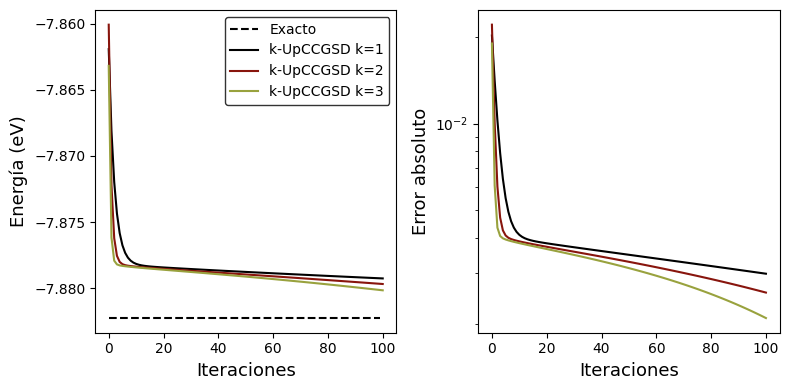

In [45]:
ex = -7.88223735
cycle = [cmr.apple(i /3) for i in range(3)]
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Iteraciones", fontsize=13)
ax[1].set_xlabel("Iteraciones", fontsize=13)
ax[0].set_ylabel("Energía (eV)", fontsize=13)
ax[1].set_ylabel("Error absoluto", fontsize=13)

ax[0].plot([j for j in range(100)], [ex for j in range(100)], marker='', color="black", ls="dashed", label="Exacto")
for i in range(3):
    ax[0].plot([j for j in range(len(valores_finales[i]))], valores_finales[i], label="k-UpCCGSD k="+str(i+1), color = cycle[i])
    ax[1].plot([j for j in range(len(valores_finales[i]))], [abs(valores_finales[i][j]-ex) for j in range(len(valores_finales[i]))],
               "-", label="Exacto", color = cycle[i])

ax[1].set_yscale("log")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)
fig.tight_layout()
plt.show()

In [34]:
params1 = {
    "sites": 4, 
    "hopping": 1,
    "potential": 0.4, 
    "pattern": "close"
    }

hubbard_chain1 = vqe_fermihubbard(params1)
hubbard_chain1.set_group_characteristics()
valores = []
for i in range(3):
    ansatz_params = {
        "repetitions": i+1,
        "base": "default.qubit",
        "interface": "autograd",
        "electrons": params1["sites"],
        "qubits": hubbard_chain1.qubits,
    }

    ansazt = upccgsd_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )
    a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=hubbard_chain1.qubits, delta_sz=0)

    minimizate_params = {
                "maxiter": 250,
                "tol": 1e-6,
                "number":  a*b,
                "theta":["generic", 0.01]}

    hubbard_chain1.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(hubbard_chain1.cost_function)
    print(i+1, energy1[-1], len(energy1))
    valores.append(energy1)

1 -3.619889807949706 251
2 -3.6199257727799377 145
3 -3.6199564530839563 103


In [36]:
for i in valores[0]:
    print(i, ",")

0.7916205573667746 ,
0.7114094652035606 ,
0.6306084523427727 ,
0.5492796201067338 ,
0.4674875971149162 ,
0.3852993544990587 ,
0.3027840007202428 ,
0.22001255720332052 ,
0.13705771627146224 ,
0.05399358311383634 ,
-0.029104596252532672 ,
-0.11216071886479767 ,
-0.1950981182081914 ,
-0.27783986465413757 ,
-0.36030907037588367 ,
-0.4424291961142852 ,
-0.5241243571445946 ,
-0.6053196258121072 ,
-0.6859413280592056 ,
-0.7659173314567572 ,
-0.8451773223768015 ,
-0.9236530700974577 ,
-1.001278675811832 ,
-1.0779908047160696 ,
-1.153728899574238 ,
-1.2284353743937158 ,
-1.3020557870916991 ,
-1.3745389902854004 ,
-1.4458372595927003 ,
-1.5159063990815673 ,
-1.5847058237525244 ,
-1.6521986191750526 ,
-1.718351578623681 ,
-1.7831352182688893 ,
-1.846523771171536 ,
-1.908495161003064 ,
-1.9690309565683548 ,
-2.0281163083405844 ,
-2.0857398683291213 ,
-2.1418936946897595 ,
-2.196573142555131 ,
-2.2497767426075637 ,
-2.301506068942984 ,
-2.351765597779137 ,
-2.4005625585493537 ,
-2.44790677889249 ,


In [37]:
for i in valores[1]:
    print(i, ",")

0.8009407010308218 ,
0.6402541582266253 ,
0.4773059097847485 ,
0.31255080955880055 ,
0.14648701783265913 ,
-0.020347973384307744 ,
-0.18738300660230253 ,
-0.35402057174572754 ,
-0.5196456080895406 ,
-0.6836355259621386 ,
-0.8453710796919293 ,
-1.004247647262639 ,
-1.1596864280661108 ,
-1.311145063259227 ,
-1.4581272145545856 ,
-1.6001907034175995 ,
-1.736953906385715 ,
-1.8681002136421743 ,
-1.9933804759082698 ,
-2.1126134783042536 ,
-2.2256845798302707 ,
-2.332542736828828 ,
-2.4331961844643706 ,
-2.5277070810555147 ,
-2.6161854276592664 ,
-2.698782563093263 ,
-2.7756845071193834 ,
-2.847105386689753 ,
-2.913281136671528 ,
-2.97446362138318 ,
-3.0309152798412113 ,
-3.082904358139676 ,
-3.130700758323493 ,
-3.174572505149551 ,
-3.2147828103514766 ,
-3.2515876980854053 ,
-3.2852341445033186 ,
-3.3159586780996113 ,
-3.343986384771879 ,
-3.3695302616238054 ,
-3.3927908656760692 ,
-3.413956207206984 ,
-3.433201841884297 ,
-3.4506911207507964 ,
-3.4665755621679932 ,
-3.480995314764154 ,
-3.

In [38]:
for i in valores[2]:
    print(i, ",")

0.8120309589752338 ,
0.5716035338069262 ,
0.326476108181351 ,
0.07814151678532627 ,
-0.1716948224114707 ,
-0.4211445390028302 ,
-0.6681867213262265 ,
-0.9107374315170754 ,
-1.1467333120151229 ,
-1.3742214586767878 ,
-1.5914461608468482 ,
-1.796923209225932 ,
-1.9894942529642508 ,
-2.168356713661667 ,
-2.3330683109162904 ,
-2.483528544504281 ,
-2.6199419095052745 ,
-2.7427688974090274 ,
-2.8526709805662933 ,
-2.9504550426751948 ,
-3.0370214622247005 ,
-3.1133186268030224 ,
-3.1803053194121924 ,
-3.2389213311785197 ,
-3.2900658778097234 ,
-3.334582918879415 ,
-3.373252248606721 ,
-3.4067851786464174 ,
-3.4358237040132398 ,
-3.4609421800128652 ,
-3.4826507020607735 ,
-3.5013995456896834 ,
-3.517584175649477 ,
-3.531550463371185 ,
-3.543599858961118 ,
-3.5539943482180445 ,
-3.562961089477729 ,
-3.5706966725814078 ,
-3.5773709761962236 ,
-3.5831306230637803 ,
-3.5881020480747297 ,
-3.5923942034619913 ,
-3.5961009305376574 ,
-3.5993030295529747 ,
-3.6020700594044 ,
-3.6044618977575547 ,
-3.6

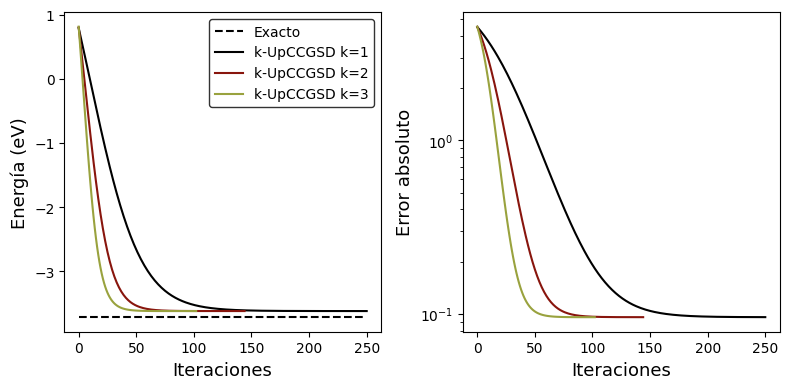

In [42]:
itera = 250
ex = -3.7155247083306806

cycle = [cmr.apple(i /3) for i in range(3)]
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Iteraciones", fontsize=13)
ax[1].set_xlabel("Iteraciones", fontsize=13)
ax[0].set_ylabel("Energía (eV)", fontsize=13)
ax[1].set_ylabel("Error absoluto", fontsize=13)

ax[0].plot([j for j in range(itera)], [ex for j in range(itera)], marker='', color="black", ls="dashed", label="Exacto")
for i in range(3):
    ax[0].plot([j for j in range(len(valores[i]))], valores[i], label="k-UpCCGSD k="+str(i+1), color = cycle[i])
    ax[1].plot([j for j in range(len(valores[i]))], [abs(valores[i][j]-ex) for j in range(len(valores[i]))],
               "-", label="Exacto",  color = cycle[i])

ax[1].set_yscale("log")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)
fig.tight_layout()
plt.show()

### Analisis de tiempos

In [ ]:
j=1
params = {
    "sites": 14,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [j,j,j]
}

open_spin_chain = vqe_spin(params)
open_spin_chain.set_group_characteristics()
print(len(open_spin_chain.hamiltonian_object))
aux = []

ansatz_params = {
    "repetitions": 1,
    "base": "default.qubit",
    "interface": "autograd",
    "electrons": 0,
    "qubits": open_spin_chain.qubits,
    "pattern": "chain"
}


ansazt = he_ansatz()
ansazt.set_device( ansatz_params )
ansazt.set_node( ansatz_params )
ansazt.set_state( ansatz_params["electrons"] )

minimizate_params = {
    "type": "SLSQP",
    "maxiter": 40,
    "tol": 1e-6,
    "number": open_spin_chain.qubits*ansatz_params["repetitions"],
    "theta":["adam", 0.3]}

open_spin_chain.node = ansazt.node

tiempo = []
for i in range(10):
    optimizer = gradiend_optimizer(minimizate_params)

    inicio = time.time()
    energy1, optimum = optimizer.VQE(open_spin_chain.cost_function)
    final = time.time()

    tiempo.append(final-inicio)

In [ ]:
tiempo

In [ ]:
sz = np.array([[1,0],[0,-1]])
si = np.array([[1,0],[0,1]])
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])

xx = np.kron( np.kron(np.kron(np.kron(sx,sx),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,sx),np.kron(sx,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(sx,sx)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,sx)),np.kron(sx,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(sx,sx)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,sx)), np.kron(np.kron(sx,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(sx,sx),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,sx),np.kron(sx,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(sx,np.kron(sx,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(sx,np.kron(sx,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(sx,np.kron(sx,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(sx,np.kron(sx,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(sx,sx)))))) ) 

yy = np.kron( np.kron(np.kron(np.kron(sy,sy),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,sy),np.kron(sy,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(sy,sy)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,sy)),np.kron(sy,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(sy,sy)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,sy)), np.kron(np.kron(sy,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(sy,sy),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,sy),np.kron(sy,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(sy,np.kron(sy,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(sy,np.kron(sy,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(sy,np.kron(sy,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(sy,np.kron(sy,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(sy,sy)))))) ) 

zz = np.kron( np.kron(np.kron(np.kron(sz,sz),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,sz),np.kron(sz,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(sz,sz)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,sz)),np.kron(sz,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(sz,sz)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,sz)), np.kron(np.kron(sz,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(sz,sz),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,sz),np.kron(sz,np.kron(si,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(sz,np.kron(sz,np.kron(si,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(sz,np.kron(sz,np.kron(si,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(sz,np.kron(sz,np.kron(si,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(sz,np.kron(sz,si)))))) ) +\
np.kron( np.kron(np.kron(np.kron(si,si),np.kron(si,si)),np.kron(si,si)), np.kron(np.kron(si,si),np.kron(si,np.kron(si,np.kron(si,np.kron(si,np.kron(sz,sz)))))) ) 

def diez(j1,j2,j3):
    h =  -j1*xx + -j2*yy + -j3*zz
    inicio = time.time()
    aux =  np.linalg.eigvals(h)
    final = time.time()    
    return final - inicio 


tiempo = []
for i in range(10):
    print(i+1)
    energy1 = diez(1,1,1)

    tiempo.append(energy1 )
    print(tiempo)

In [ ]:
for i in tiempo:
    print(f'{i:.12f}')